In [1]:
!git clone https://github.com/NidhiAI/Biometric-Customer-Authentication

Cloning into 'Biometric-Customer-Authentication'...
remote: Enumerating objects: 223, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 223 (delta 10), reused 0 (delta 0), pack-reused 194
Receiving objects: 100% (223/223), 13.26 MiB | 17.61 MiB/s, done.
Resolving deltas: 100% (59/59), done.


In [3]:
cd '/content/Biometric-Customer-Authentication'

/content/Biometric-Customer-Authentication


In [6]:
!python genderExtractFeatures.py

2023-03-17 17:56:38.243705: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-17 17:56:40.225004: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-17 17:56:40.225315: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-17 17:56:40.225350: W tensorfl

In [32]:
##Modeling - AIML
#from genetic_selection import GeneticSelectionCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB 

#Evaluation
from sklearn import metrics

# confusion matrix
import sklearn.metrics

import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
#import csv
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras

from keras import layers

In [7]:
import pandas as pd
print('start reading csv file ..')
data = pd.read_csv('/content/Biometric-Customer-Authentication/genderDetection/maleFemaleAudioFeatures.csv')
data.head() # Display 5 wav files features 

start reading csv file ..


,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,Naseeruddin_Shah-1.wav,0.376094,0.030631,931.741125,1241.241272,1766.527915,0.041611,-377.436279,167.818512,13.445023,...,-4.874533,3.015424,-7.811646,3.535903,1.873103,-0.084137,-1.040924,0.396692,0.471761,male
1,Amitabh_Bachchan-1.wav,0.400907,0.014618,815.422445,1093.299399,1390.453423,0.036333,-458.473480,165.520737,31.746883,...,0.892941,6.364282,-0.537627,5.447022,1.836523,-0.654764,2.239891,1.436717,-0.029083,male
2,Amir_Khan-1.wav,0.346175,0.086336,1008.205080,1270.591251,1972.590770,0.039816,-260.449829,178.987518,-11.737485,...,2.068178,1.889872,-11.387841,9.102327,-7.263670,-3.212919,-6.624712,1.364005,-7.225740,male
3,Ajay_Devgan-1.wav,0.454327,0.058352,967.308983,1188.780388,1769.374486,0.048485,-281.642059,176.901978,4.768245,...,0.930168,5.092219,-7.643029,6.893967,0.913580,0.428194,-6.172984,-0.538485,-0.793509,male
4,Om_Puri-1.wav,0.451952,0.015616,1479.245873,1679.944593,3127.095146,0.072111,-385.453308,142.913589,-12.783757,...,-4.126165,4.602947,-9.281726,8.186352,-7.795929,7.076570,-1.692408,2.985802,1.742143,male


In [9]:

data.label.unique()


array(['male', 'female'], dtype=object)

In [10]:
data.label.value_counts()

female    6
male      5
Name: label, dtype: int64

In [11]:
# Dropping unneccesary columns 'filename'
data = data.drop(['filename'],axis=1)#Encoding the Labels

<Axes: xlabel='label', ylabel='count'>

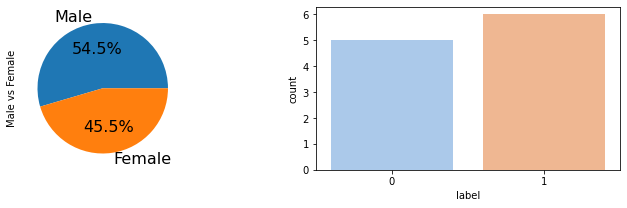

In [33]:
import seaborn as sns
plt.figure(figsize=(12, 3))

# left side graph
plt.subplot(1, 2, 1)
data.label.value_counts().plot(kind="pie",
                                           fontsize=16,
                                           labels=["Male", "Female"],
                                           ylabel="Male vs Female",
                                           autopct='%1.1f%%');
#plt.show()

# right side graph
plt.subplot(1, 2, 2)
sns.countplot(x="label",data=data, palette="pastel")

<Axes: >

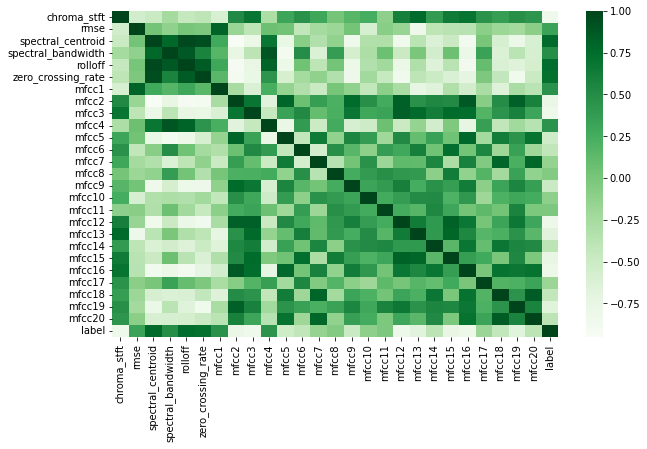

In [34]:
# check corerelation

plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),cmap='Greens',annot=False)

In [12]:
# now we will convert these 2 values in 0/1 
# male to 0, female to 1
data.label.replace(['male', 'female'],[0,1], inplace=True)

In [13]:
# Divive data into x(Independent variables) and y (Target/Dependent variable) 
x = data.drop("label", axis= 1)
y = data["label"]

In [35]:
# Print x 
print(x.shape)
x.head(2)

(11, 26)


AttributeError: ignored

In [ ]:
# Print y 
print(y.shape)
y.head(2)

In [14]:
#Separate out objects and numeric columns in x  
cat_cols = x.columns[x.dtypes == 'object']
num_cols = x.columns[(x.dtypes == 'float64') | (x.dtypes == 'int64')]
# num_cols1=list(x.select_dtypes(exclude='object').columns) # can do this way also 

In [15]:
cat_cols

Index([], dtype='object')

In [16]:
num_cols

Index(['chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth',
       'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11',
       'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
       'mfcc19', 'mfcc20'],
      dtype='object')

In [17]:
#applying scalar to all numeric columns 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#x[num_cols]=scaler.fit_transform(x[num_cols]) # no categorical columns, so can go with below 
x=scaler.fit_transform(x)

In [23]:
#Sample for training and testing the model
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8, 26), (3, 26), (8,), (3,))

In [37]:
lr = LogisticRegression(random_state=0).fit(X_train, Y_train)
rf = RandomForestClassifier(n_estimators = 7).fit(X_train, Y_train)
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, Y_train)
svc = SVC().fit(X_train, Y_train)
#nb = ComplementNB().fit(X_train, Y_train) # can not run this with negative values in data
nb = GaussianNB().fit(X_train, Y_train)

ValueError: ignored

In [25]:
# Prediction on Train data set 
lr_pred = lr.predict(X_train)
rf_pred = rf.predict(X_train)
knn_pred = knn.predict(X_train)
svc_pred = svc.predict(X_train)
nb_pred = nb.predict(X_train)

In [26]:
lr_train_score_1 = 100*metrics.accuracy_score(Y_train, lr_pred)
rf_train_score_1 = 100*metrics.accuracy_score(Y_train, rf_pred)
knn_train_score_1 = 100*metrics.accuracy_score(Y_train, knn_pred)
svc_train_score_1 = 100*metrics.accuracy_score(Y_train, svc_pred)
nb_train_score_1 = 100*metrics.accuracy_score(Y_train, nb_pred)

In [27]:
print("Train Accuracy score of LR = ",lr_train_score_1)
print("Train Accuracy score of RF = ",rf_train_score_1)
print("Train Accuracy score of KNN = ",knn_train_score_1)
print("Train Accuracy score of SVC = ",svc_train_score_1)
print("Train Accuracy score of NB = ",nb_train_score_1)

Train Accuracy score of LR =  100.0
Train Accuracy score of RF =  100.0
Train Accuracy score of KNN =  87.5
Train Accuracy score of SVC =  100.0
Train Accuracy score of NB =  100.0


In [28]:
# Prediction on Test data set 
lr_pred_test = lr.predict(X_test)
rf_pred_test = rf.predict(X_test)
knn_pred_test = knn.predict(X_test)
svc_pred_test = svc.predict(X_test)
nb_pred_test = nb.predict(X_test)

In [29]:
lr_test_score_1 = 100*metrics.accuracy_score(Y_test, lr_pred_test)
rf_test_score_1 = 100*metrics.accuracy_score(Y_test, rf_pred_test)
knn_test_score_1 = 100*metrics.accuracy_score(Y_test, knn_pred_test)
svc_test_score_1 = 100*metrics.accuracy_score(Y_test, svc_pred_test)
nb_test_score_1 = 100*metrics.accuracy_score(Y_test, nb_pred_test)

In [30]:
print("Test Accuracy score of LR = ",lr_test_score_1)
print("Test Accuracy score of RF = ",rf_test_score_1)
print("Test Accuracy score of KNN = ",knn_test_score_1)
print("Test Accuracy score of SVC = ",svc_test_score_1)
print("Test Accuracy score of NB = ",nb_test_score_1)

Test Accuracy score of LR =  33.33333333333333
Test Accuracy score of RF =  66.66666666666666
Test Accuracy score of KNN =  66.66666666666666
Test Accuracy score of SVC =  33.33333333333333
Test Accuracy score of NB =  0.0


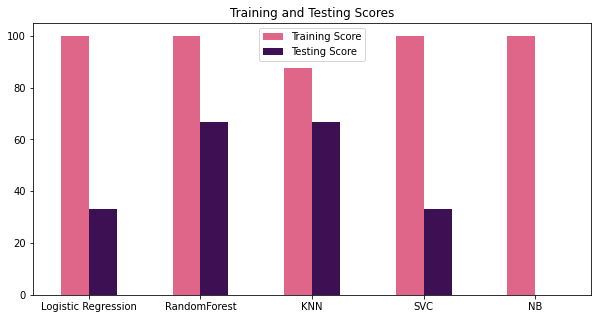

In [36]:
# Plot graph to compare models for Training and Testing Scores
trainScores = [lr_train_score_1, rf_train_score_1, knn_train_score_1, svc_train_score_1, nb_train_score_1]

testScores = [lr_test_score_1, rf_test_score_1, knn_test_score_1, svc_test_score_1, nb_test_score_1]

indices = ['Logistic Regression', 'RandomForest', 'KNN', 'SVC' , 'NB']

scores = pd.DataFrame({'Training Score': trainScores,'Testing Score': testScores}, index=indices)

plot = scores.plot.bar(figsize=(10, 5), rot=0, color=['#df6589ff', '#3c1053ff'])

plt.title('Training and Testing Scores')
plt.show()

In [38]:
# print scores dataframe created above 
scores.sort_values(by='Testing Score', ascending=False, inplace = True)
scores

,Training Score,Testing Score
RandomForest,100.0,66.666667
KNN,87.5,66.666667
Logistic Regression,100.0,33.333333
SVC,100.0,33.333333
NB,100.0,0.000000


In [39]:
predVals = pd.DataFrame(data={'truth': Y_test, 
                              'Logisticregression': lr_pred_test, 
                              'RandomForest': rf_pred_test, 
                              'KNN': knn_pred_test, 
                              'SVC': svc_pred_test, 
                              'NaiveBayes': nb_pred_test})

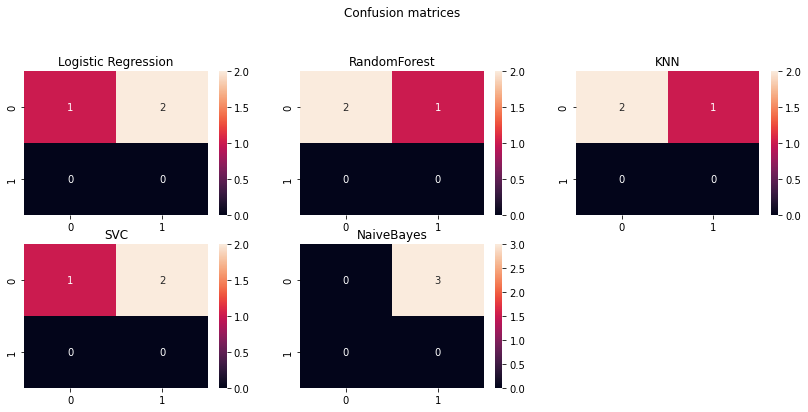

In [40]:
plt.figure(figsize=(14, 9))

plt.subplot(3, 3, 1)
sns.heatmap(sklearn.metrics.confusion_matrix(Y_test, lr_pred_test), annot=True).set(title='Logistic Regression')

plt.subplot(3, 3, 2)
sns.heatmap(sklearn.metrics.confusion_matrix(Y_test, rf_pred_test), annot=True).set(title='RandomForest')

plt.subplot(3, 3, 3)
sns.heatmap(sklearn.metrics.confusion_matrix(Y_test, knn_pred_test), annot=True).set(title='KNN')

plt.subplot(3, 3, 4)
sns.heatmap(sklearn.metrics.confusion_matrix(Y_test, svc_pred_test), annot=True).set(title='SVC')

plt.subplot(3, 3, 5)
sns.heatmap(sklearn.metrics.confusion_matrix(Y_test, nb_pred_test), annot=True).set(title='NaiveBayes')

plt.suptitle('Confusion matrices')
plt.show()

In [41]:
print("<< Logistic Regression >> \n\n", sklearn.metrics.classification_report(Y_test, lr_pred_test))

<< Logistic Regression >> 

               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.00      0.00      0.00         0

    accuracy                           0.33         3
   macro avg       0.50      0.17      0.25         3
weighted avg       1.00      0.33      0.50         3



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
print("<< Random Forest >>\n\n", sklearn.metrics.classification_report(Y_test, rf_pred_test))

<< Random Forest >>

               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
print("<< K Nearest Neighbour >>\n\n", sklearn.metrics.classification_report(Y_test, knn_pred_test))

<< K Nearest Neighbour >>

               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
print("<< Supprt Vector >>\n\n", sklearn.metrics.classification_report(Y_test, svc_pred_test))

<< Supprt Vector >>

               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.00      0.00      0.00         0

    accuracy                           0.33         3
   macro avg       0.50      0.17      0.25         3
weighted avg       1.00      0.33      0.50         3



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
print("<< Naive Bayes >>\n\n", sklearn.metrics.classification_report(Y_test, nb_pred_test))

<< Naive Bayes >>

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       3.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [47]:
predVals.sample(3)

,truth,Logisticregression,RandomForest,KNN,SVC,NaiveBayes
2,0,1,0,0,1,1
4,0,1,1,1,1,1
3,0,0,0,0,0,1
